In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# For reproductibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root="MNIST_data/",train=True,
                          transform=transform, download=True)
mnist_test  = datasets.MNIST(root="MNIST_data/",train=False,
                          transform=transform, download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size = batch_size,
                                        shuffle=True, drop_last=True)



In [5]:
# MNIST data image of shape 28*28 = 784
linear = torch.nn.Linear(784, 10, bias = True).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is interally computed
optimizer = torch.optim.SGD(linear.parameters(),lr=1e-1)

In [7]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X,Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis,Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch : ','%04d' % (epoch+1), 'cost = ','{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch :  0001 cost =  0.359297454
Epoch :  0002 cost =  0.331329852
Epoch :  0003 cost =  0.316265196
Epoch :  0004 cost =  0.307216376
Epoch :  0005 cost =  0.299996674
Epoch :  0006 cost =  0.295014083
Epoch :  0007 cost =  0.291176945
Epoch :  0008 cost =  0.287394166
Epoch :  0009 cost =  0.284717917
Epoch :  0010 cost =  0.282007337
Epoch :  0011 cost =  0.279870480
Epoch :  0012 cost =  0.277783871
Epoch :  0013 cost =  0.276157171
Epoch :  0014 cost =  0.274552971
Epoch :  0015 cost =  0.272791535
Learning finished


Accuracy :  0.8797999620437622
Label:  7
Prediction :  7


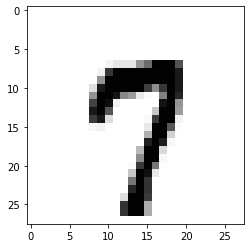

In [10]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ',accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction : ', torch.argmax(single_prediction,1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',interpolation='nearest')
    plt.show()